In [1]:
%pylab inline
from numpy.lib.recfunctions import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
def filternan(a):
    return a[isnan(a) != True]

In [15]:
segments = genfromtxt("segments.csv", delimiter=',', names=True)
names = genfromtxt("names.csv", delimiter=',', names=True)
callsigns = genfromtxt("callsigns.csv", delimiter=',', names=True)
imos = genfromtxt("imos.csv", delimiter=',', names=True)
fishing = genfromtxt("../Combinedfishing_2014.csv", delimiter=',', names=True)
fishing = append_fields(fishing, 'fishing', [], dtypes='<f4')
fishing['fishing'] = 1.0
tileset = genfromtxt("pipeline_205_08_07_13_33_31_mmsi_list.csv", delimiter=',', names=True)
tileset = append_fields(tileset, 'tileset', [], dtypes='<f4')
tileset['tileset'] = 1.0

d = join_by('mmsi', segments, names, jointype='outer', asrecarray=True)
d = join_by('mmsi', d, imos, jointype='outer', asrecarray=True)
d = join_by('mmsi', d, callsigns, jointype='outer', asrecarray=True)
d = join_by('mmsi', d, fishing, jointype='outer', asrecarray=True)
d = join_by('mmsi', d, tileset, jointype='outer', asrecarray=True)

d = d.filled(nan)
savez("mmsi_counts.npz", d)

In [30]:
d = load("mmsi_counts.npz")['arr_0']

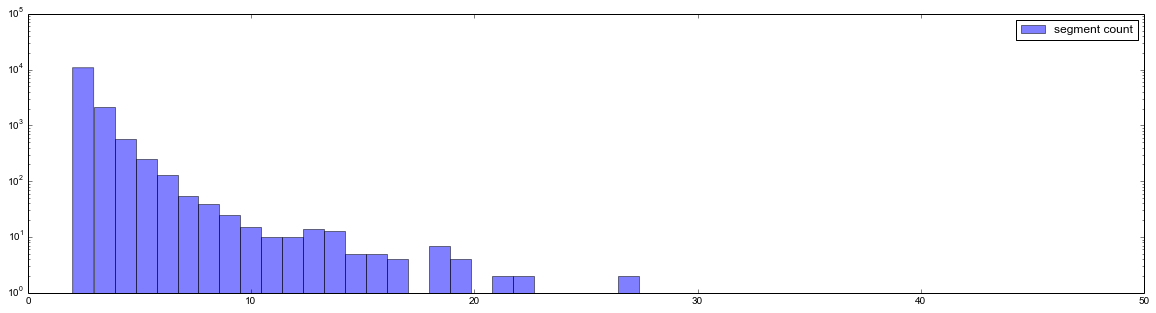

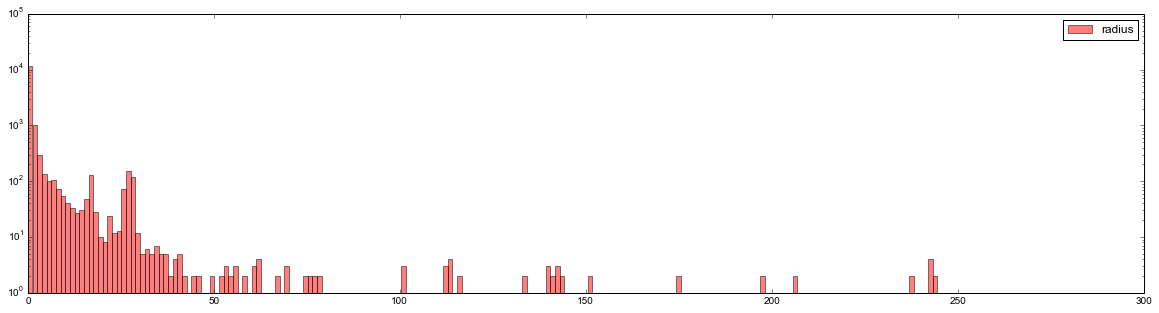

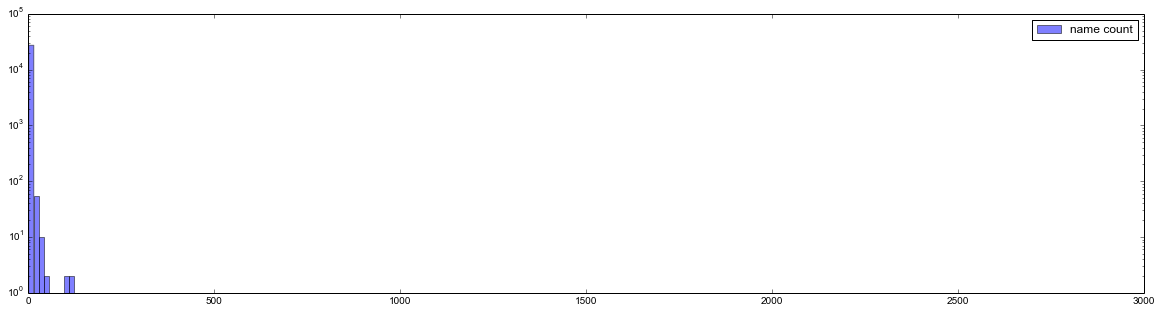

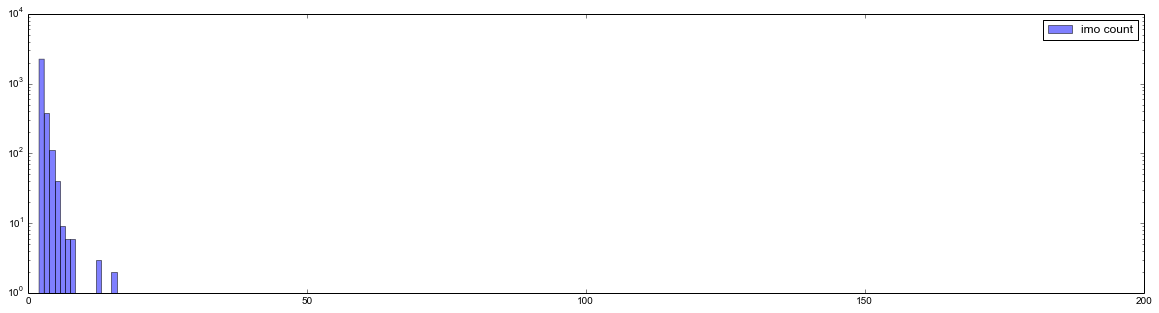

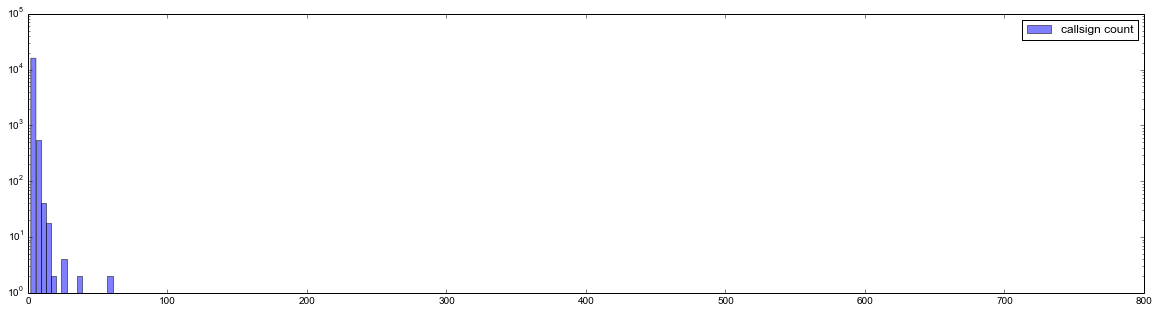

In [31]:
f = d[d['fishing'] == 1]

histfig = figure(figsize=(20,5))
hist(filternan(f['seg_count']), bins=50, normed=False, color='b', alpha=0.5, log=True, label="segment count")
legend(); show()

histfig = figure(figsize=(20,5))
hist(filternan(f['radius']), bins=200, normed=False, color='r', alpha=0.5, log=True, label="radius")
legend(); show()

histfig = figure(figsize=(20,5))
hist(filternan(f['name_count']), bins=200, normed=False, color='b', alpha=0.5, log=True, label="name count")
legend(); show()

histfig = figure(figsize=(20,5))
hist(filternan(f['imo_count']), bins=200, normed=False, color='b', alpha=0.5, log=True, label="imo count")
legend(); show()

histfig = figure(figsize=(20,5))
hist(filternan(f['callsign_count']), bins=200, normed=False, color='b', alpha=0.5, log=True, label="callsign count")
legend(); show()


In [69]:
def compare(col1, col2):
    col1_coord = unique(filternan(d[col1]))
    col1_coord.sort()
    col2_coord = unique(filternan(d[col2]))
    col2_coord.sort()
    
    all_counts = zeros((col1_coord.shape[0], col2_coord.shape[0]))
    for i1, c1 in enumerate(col1_coord):
        for i2, c2 in enumerate(col2_coord):
            v = d[d[col1] > c1]
            v = v[v[col2] > c2]
            all_counts[i1,i2] = v.shape[0]

    return col1_coord, col2_coord, all_counts

In [87]:
c1, c2, p = compare('seg_count', 'name_count')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


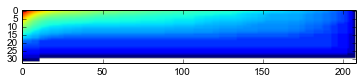

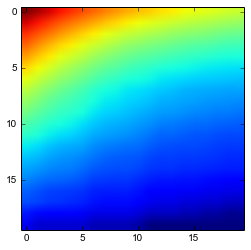

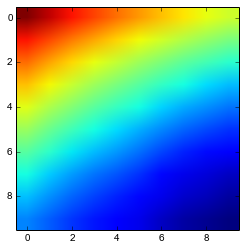

In [86]:
x = log(p)
imshow(x); show()
imshow(x[:20,:20]); show()
imshow(x[:10,:10]); show()

In [48]:
f = d[d['tileset'] == 1]
print "#### 0.2"
print f[f['seg_count'] == 2.0][200]['mmsi']
print f[f['seg_count'] == 2.0][201]['mmsi']
print f[f['seg_count'] == 2.0][202]['mmsi']
print f[f['seg_count'] == 2.0][203]['mmsi']

print "#### 0.5"
print f[f['seg_count'] == 5.0][200]['mmsi']
print f[f['seg_count'] == 5.0][201]['mmsi']
print f[f['seg_count'] == 5.0][202]['mmsi']
print f[f['seg_count'] == 5.0][203]['mmsi']


#### 0.2
205336000.0
205346000.0
205482090.0
205532000.0
#### 0.5
440071000.0
440107870.0
440111111.0
440120530.0


* 0.2
  * 205336000 no apparent spoofing: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/970bbf0e-1ddb-4d63-a46b-4d1b0a638201
  * 205346000 three vessels: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/692d75af-91b5-4948-8bf4-4edb41263551
  * 205482090 multiple vessels, NOT FISHING: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/f44fad67-549b-4c8f-95fb-6a1becdba350
  * 205532000 multiple vessels: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/fd9a132c-65ff-49a7-821e-a152a0682a8c
  
* 0.5
  * 440071000 two vessels: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/46d19ae5-e395-4c69-bea3-d4dc75113b9b
  * 440107870 two vessels: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/5c0d7a81-335d-4c96-87a6-058e6c0e1f55
  * 440111111 not properly despoofed, mulytiple vessels, broken points: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/483382d5-243d-49c9-8019-edef6d7c72ed
  * 440120530 four vessels or bad despoofing: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/06ff655c-171a-4357-a3df-6f6ade288694

In [49]:
f = d[d['tileset'] == 1]
print "#### 0.2"
print f[f['name_count'] == 2.0][200]['mmsi']
print f[f['name_count'] == 2.0][201]['mmsi']
print f[f['name_count'] == 2.0][202]['mmsi']
print f[f['name_count'] == 2.0][203]['mmsi']

print "#### 0.5"
print f[f['name_count'] == 5.0][200]['mmsi']
print f[f['name_count'] == 5.0][201]['mmsi']
print f[f['name_count'] == 5.0][202]['mmsi']
print f[f['name_count'] == 5.0][203]['mmsi']


#### 0.2
211495000.0
211501000.0
211502000.0
211516530.0
#### 0.5
261000660.0
261003220.0
261003640.0
261004780.0


* 0.2
  * 211495000 spoofing, no distinct vessels: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/b5128762-194c-4478-a808-c1bdb4bb4ea7
  * 211501000 no spoofing: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/45516aa0-290f-4ae0-aff1-0f3825dd92a5
  * 211502000 borken locations: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/ae46157c-a61e-47a8-974e-78bc2adf0d9e
  * 211516530 no spoofing: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/362fd639-c19d-44e5-b979-5941aa8bdb58
* 0.5
  * 261000660 bad despoofing?: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/76fe3ed2-8627-4d3c-bf7c-055a1c914e83
  * 261003220 multiple vessels: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/664f36bd-bff2-42b5-9c1c-60104b02f558
  * 261003640 multiple vessels, bad despoofing: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/efce1c0f-f902-4a08-90eb-db228688b246
  * 261004780 bad positions, spoofing: http://alpha-dev.globalfishingwatch.org/viz?workspace=/workspace/b7604ea5-49b9-4a9d-9d67-11327aeaeef2
  
  